<a href="https://colab.research.google.com/github/drskprabhakar/Axial-Length-Prediction-ML-Regression-mode/blob/main/15324_normal_OD_cup_vs_large_OD_cup_CNN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np


In [2]:
os.listdir('/content/drive/MyDrive/optic cup images/split')

['train', 'val', 'test']

In [4]:
os.listdir('/content/drive/MyDrive/optic cup images/split/train'),os.listdir('/content/drive/MyDrive/optic cup images/split/val'),os.listdir('/content/drive/MyDrive/optic cup images/split/test')

(['normal cup', 'large cup'],
 ['normal cup', 'large cup'],
 ['normal cup', 'large cup'])

In [8]:
trainnormalcup = os.listdir('/content/drive/MyDrive/optic cup images/split/train/normal cup')
trainnormalcup
print(len(trainnormalcup))

30


In [9]:
trainlargecup = os.listdir('/content/drive/MyDrive/optic cup images/split/train/large cup')
trainlargecup
print(len(trainlargecup))

40


In [11]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1/255)

In [12]:
trainimages = datagen.flow_from_directory('/content/drive/MyDrive/optic cup images/split/train',
                                          target_size=(224,224))

validationimages = datagen.flow_from_directory('/content/drive/MyDrive/optic cup images/split/val',
                                          target_size=(224,224))

testimages = datagen.flow_from_directory('/content/drive/MyDrive/optic cup images/split/test',
                                          target_size=(224,224))

Found 70 images belonging to 2 classes.
Found 8 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [17]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

model = Sequential([Conv2D(16,(3,3), activation='relu', input_shape=(224,224,3)),
                    MaxPooling2D(2,2),

                    Conv2D(32,(3,3), activation='relu',),
                    MaxPooling2D(2,2),

                    Flatten(),
                    Dense(64, activation='relu'),
                    Dense(2, activation='softmax')])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 111, 111, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 93312)             0         
                                                                 
 dense_4 (Dense)             (None, 64)               

In [29]:
model.fit(trainimages,
          batch_size=10,
          epochs=10,
          validation_data=validationimages)
model.save('normalcupvslargecup_model.keras')

Epoch 1/10
3/3 [==============================] - 6s 2s/step - loss: 0.3416 - accuracy: 0.8714 - val_loss: 0.5400 - val_accuracy: 0.7500
Epoch 2/10
3/3 [==============================] - 7s 2s/step - loss: 0.3837 - accuracy: 0.8429 - val_loss: 0.6167 - val_accuracy: 0.7500
Epoch 3/10
3/3 [==============================] - 12s 6s/step - loss: 0.3993 - accuracy: 0.8429 - val_loss: 0.4338 - val_accuracy: 0.8750
Epoch 4/10
3/3 [==============================] - 8s 2s/step - loss: 0.3352 - accuracy: 0.9000 - val_loss: 0.5850 - val_accuracy: 0.7500
Epoch 5/10
3/3 [==============================] - 6s 3s/step - loss: 0.3406 - accuracy: 0.8286 - val_loss: 0.4551 - val_accuracy: 1.0000
Epoch 6/10
3/3 [==============================] - 9s 4s/step - loss: 0.2889 - accuracy: 0.8857 - val_loss: 0.5873 - val_accuracy: 0.7500
Epoch 7/10
3/3 [==============================] - 6s 1s/step - loss: 0.2704 - accuracy: 0.8714 - val_loss: 0.6137 - val_accuracy: 0.7500
Epoch 8/10
3/3 [========================

In [34]:
y_pred = model.predict(testimages)
y_pred

1/1 [==============================] - 1s 545ms/step


array([[5.2511126e-01, 4.7488862e-01],
       [9.6109205e-01, 3.8907882e-02],
       [6.8421406e-01, 3.1578603e-01],
       [9.4452173e-01, 5.5478141e-02],
       [9.6038646e-01, 3.9613515e-02],
       [9.4120389e-01, 5.8796037e-02],
       [8.5593528e-01, 1.4406472e-01],
       [9.6492612e-01, 3.5073832e-02],
       [7.8144509e-01, 2.1855499e-01],
       [1.0586700e-04, 9.9989414e-01]], dtype=float32)

In [31]:
y_pred1 = np.argmax(y_pred,axis=1)
y_pred1

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [25]:
y_true=testimages.classes

In [22]:
testimages.class_indices

{'large cup': 0, 'normal cup': 1}

In [35]:
from sklearn import metrics
metrics.confusion_matrix(y_true,y_pred1)

array([[5, 0],
       [4, 1]])

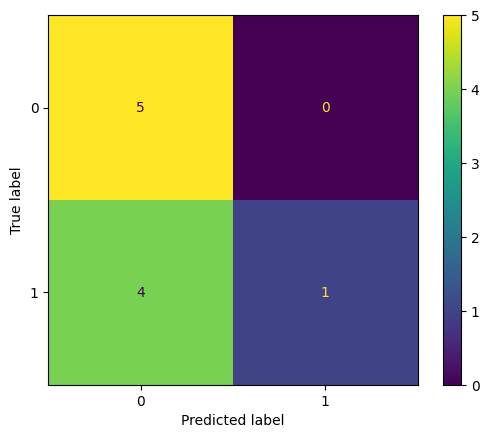

In [27]:
metrics.ConfusionMatrixDisplay.from_predictions(y_true,y_pred1)

In [36]:
print(metrics.classification_report(y_true,y_pred1))

              precision    recall  f1-score   support

           0       0.56      1.00      0.71         5
           1       1.00      0.20      0.33         5

    accuracy                           0.60        10
   macro avg       0.78      0.60      0.52        10
weighted avg       0.78      0.60      0.52        10



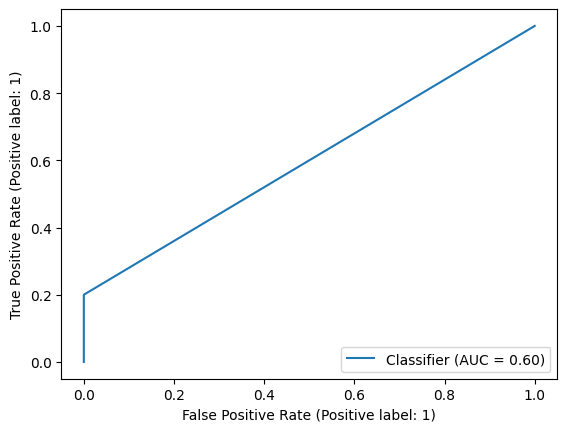

In [37]:
metrics.RocCurveDisplay.from_predictions(y_true,y_pred1)